<h1 align="center">LOAN DEFAULT PREDICTION MODEL</h1>

Dataset: <a href="https://www.kaggle.com/datasets/nikhil1e9/loan-default/data">Click here for dataset</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan_default1.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### DATA DESCRIPTION

* LoanID - A unique identifier for each loan.
* Age - The age of the borrower.
* Income - The annual income of the borrower.
* LoanAmount - The amount of money being borrowed.
* CreditScore -The credit score of the borrower, indicating their creditworthiness.
* MonthsEmployed - The number of months the borrower has been employed.
* NumCreditLines - The number of credit lines the borrower has open.
* InterestRate - The interest rate for the loan.
* Loan Term - The term length of the loan in months.
* DTIRatio - The Debt-to-Income ratio, indicating the borrower's debt compared to their income.
* Education - The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).
* EmploymentType - The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
* Marital Status - The marital status of the borrower (Single, Married, Divorced).
* HasMortgage - Whether the borrower has a mortgage (Yes or No).
* HasDependents - Whether the borrower has dependents (Yes or No).
* LoanPurpose - The purpose of the loan (Home, Auto, Education, Business, Other).
* HasCoSigner - Whether the loan has a co-signer (Yes or No).
* Default - The binary target variable indicating whether the loan defaulted (1) or not (0).

### EDA

In [3]:
#from ydata_profiling import ProfileReport

#prof = ProfileReport(df)
#prof.to_file('Loan_Default EDA.html')

In [4]:
df.shape

(54365, 18)

In [5]:
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54365 entries, 0 to 54364
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          54365 non-null  object 
 1   Age             54365 non-null  int64  
 2   Income          54365 non-null  int64  
 3   LoanAmount      54365 non-null  int64  
 4   CreditScore     54365 non-null  int64  
 5   MonthsEmployed  54365 non-null  int64  
 6   NumCreditLines  54365 non-null  int64  
 7   InterestRate    54365 non-null  float64
 8   LoanTerm        54365 non-null  int64  
 9   DTIRatio        54365 non-null  float64
 10  Education       54365 non-null  object 
 11  EmploymentType  54365 non-null  object 
 12  MaritalStatus   54365 non-null  object 
 13  HasMortgage     54365 non-null  object 
 14  HasDependents   54365 non-null  object 
 15  LoanPurpose     54365 non-null  object 
 16  HasCoSigner     54365 non-null  object 
 17  Default         54365 non-null 

In [8]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000,54365.000000
mean,43.505527,82474.305527,127618.961372,574.461455,59.525338,2.497176,13.533950,36.028033,0.502780,0.116895
std,14.988834,38936.210791,70722.078060,158.734920,34.617257,1.116732,6.639729,16.938434,0.230474,0.321298
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48784.000000,66405.000000,437.000000,29.000000,1.000000,7.810000,24.000000,0.300000,0.000000
50%,43.000000,82436.000000,127620.000000,574.000000,60.000000,2.000000,13.570000,36.000000,0.500000,0.000000
75%,56.000000,116007.000000,188958.000000,711.000000,89.000000,3.000000,19.280000,48.000000,0.700000,0.000000
max,69.000000,149997.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
category_cols = df[["Education","EmploymentType","MaritalStatus",
                    "HasMortgage","HasDependents","LoanPurpose","HasCoSigner","Default"]]

In [10]:
# Unique values in each categorical column 

for i in category_cols.columns:
    print('Unique values in',i, 'are :')
    print(category_cols[i].value_counts())
    print('*'*50)

Unique values in Education are :
Education
Bachelor's     13709
PhD            13652
High School    13521
Master's       13483
Name: count, dtype: int64
**************************************************
Unique values in EmploymentType are :
EmploymentType
Self-employed    13733
Part-time        13626
Full-time        13511
Unemployed       13495
Name: count, dtype: int64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
Divorced    18191
Single      18141
Married     18033
Name: count, dtype: int64
**************************************************
Unique values in HasMortgage are :
HasMortgage
Yes    27236
No     27129
Name: count, dtype: int64
**************************************************
Unique values in HasDependents are :
HasDependents
No     27285
Yes    27080
Name: count, dtype: int64
**************************************************
Unique values in LoanPurpose are :
LoanPurpose
Business     11050
Auto         10880
Oth

In [11]:
# Unique values proportion in each categorical column 

for i in category_cols.columns:
    print('Unique values in',i, 'are :')
    print(category_cols[i].value_counts(normalize=True))
    print('*'*50)

Unique values in Education are :
Education
Bachelor's     0.252166
PhD            0.251117
High School    0.248708
Master's       0.248009
Name: proportion, dtype: float64
**************************************************
Unique values in EmploymentType are :
EmploymentType
Self-employed    0.252607
Part-time        0.250639
Full-time        0.248524
Unemployed       0.248230
Name: proportion, dtype: float64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
Divorced    0.334609
Single      0.333689
Married     0.331702
Name: proportion, dtype: float64
**************************************************
Unique values in HasMortgage are :
HasMortgage
Yes    0.500984
No     0.499016
Name: proportion, dtype: float64
**************************************************
Unique values in HasDependents are :
HasDependents
No     0.501885
Yes    0.498115
Name: proportion, dtype: float64
**************************************************
Unique v

## SPLITTING THE DATA

In [12]:
X = df.drop(['LoanID','Default'],axis='columns')
y = df['Default']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## FEATURE ENGINEERING

In [15]:
X1 = X.select_dtypes(include=['int64','float64'])

# For checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Checking Multicollinearity
vif_info = pd.DataFrame()   ## Creating an empty data frame
vif_info['Column'] = X1.columns  ## A new column with all the independent variables
vif_info['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]   ## Creating a new column with VIF values
vif_info.sort_values('VIF', ascending=False)   ## Sorting the data in descending order

,Column,VIF
3,CreditScore,10.593222
0,Age,7.830303
5,NumCreditLines,5.408783
8,DTIRatio,5.230551
7,LoanTerm,5.047071
1,Income,5.013991
6,InterestRate,4.734981
2,LoanAmount,3.996375
4,MonthsEmployed,3.725696


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,dtype=np.int32),['MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']),
    ('tnf2',OrdinalEncoder(categories=[["High School","Bachelor's","Master's","PhD"],["Unemployed","Part-time","Self-employed","Full-time"]]),["Education","EmploymentType"]),
    ('tnf3',StandardScaler(),['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio'])],
     remainder='passthrough')

X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

In [17]:
print("Shape of the training set: ", X_train_scaled.shape)   
print("Shape of the test set: ", X_test_scaled.shape)
print('-'*50)

print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True)*100)
print('-'*50)

print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True)*100)
print('-'*50)

Shape of the training set:  (38055, 25)
Shape of the test set:  (16310, 25)
--------------------------------------------------
Percentage of classes in the training set:
Default
0    88.314282
1    11.685718
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in the test set:
Default
0    88.301655
1    11.698345
Name: proportion, dtype: float64
--------------------------------------------------


## MODEL BUILDING

### 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

#### Checking the performance on the training dataset

Confusion Matrix:


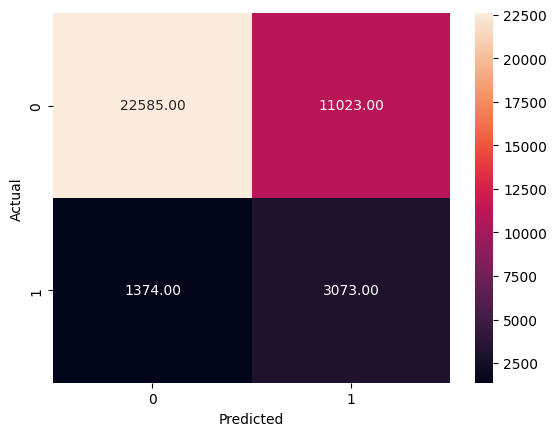

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     33608
           1       0.22      0.69      0.33      4447

    accuracy                           0.67     38055
   macro avg       0.58      0.68      0.56     38055
weighted avg       0.86      0.67      0.73     38055

--------------------------------------------------------------------------------


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

lr_y_train_pred = lr.predict(X_train_scaled)

print("Confusion Matrix:")
lr_train_cm = confusion_matrix(y_train,lr_y_train_pred,labels=[0,1])
sns.heatmap(lr_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, lr_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


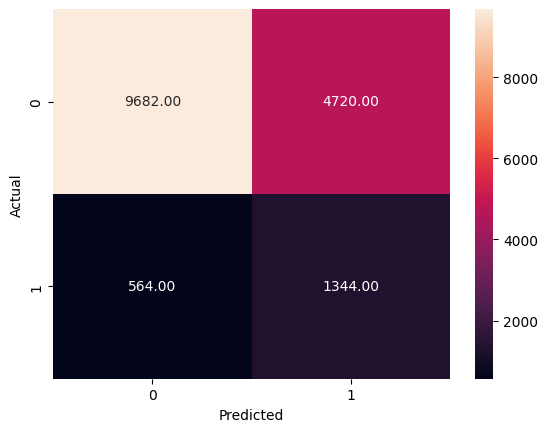

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.79     14402
           1       0.22      0.70      0.34      1908

    accuracy                           0.68     16310
   macro avg       0.58      0.69      0.56     16310
weighted avg       0.86      0.68      0.73     16310

--------------------------------------------------------------------------------


In [20]:
lr_y_test_pred = lr.predict(X_test_scaled)

print("Confusion Matrix:")
lr_test_cm = confusion_matrix(y_test,lr_y_test_pred,labels=[0,1])
sns.heatmap(lr_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, lr_y_test_pred))
print('-'*80)

### 2. Balanced Random Forest Classifier 

In [21]:
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(random_state=42,max_depth=5,max_features=5)
brfc.fit(X_train_scaled,y_train)

BalancedRandomForestClassifier(max_depth=5, max_features=5, random_state=42)

#### Checking the performance on the training dataset

Confusion Matrix:


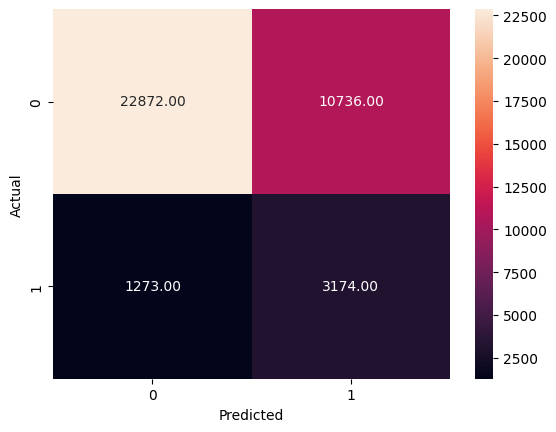

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     33608
           1       0.23      0.71      0.35      4447

    accuracy                           0.68     38055
   macro avg       0.59      0.70      0.57     38055
weighted avg       0.86      0.68      0.74     38055

--------------------------------------------------------------------------------


In [22]:
brfc_y_train_pred = brfc.predict(X_train_scaled)

print("Confusion Matrix:")
brfc_train_cm = confusion_matrix(y_train,brfc_y_train_pred,labels=[0,1])
sns.heatmap(brfc_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, brfc_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


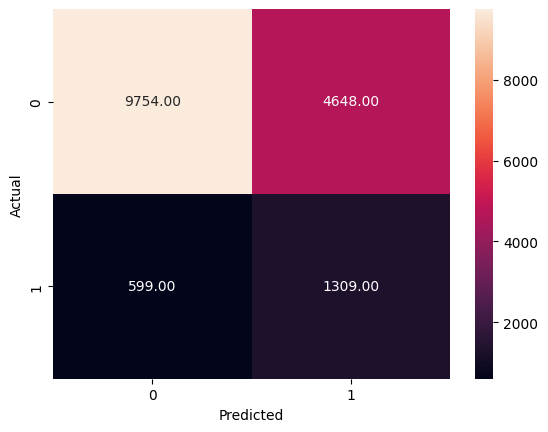

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     14402
           1       0.22      0.69      0.33      1908

    accuracy                           0.68     16310
   macro avg       0.58      0.68      0.56     16310
weighted avg       0.86      0.68      0.73     16310

--------------------------------------------------------------------------------


In [23]:
brfc_y_test_pred = brfc.predict(X_test_scaled)

print("Confusion Matrix:")
brfc_test_cm = confusion_matrix(y_test,brfc_y_test_pred,labels=[0,1])
sns.heatmap(brfc_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, brfc_y_test_pred))
print('-'*80)

### 3. Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42,class_weight='balanced',max_depth=5,max_features=5)
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       random_state=42)

#### Checking the performance on the training dataset

Confusion Matrix:


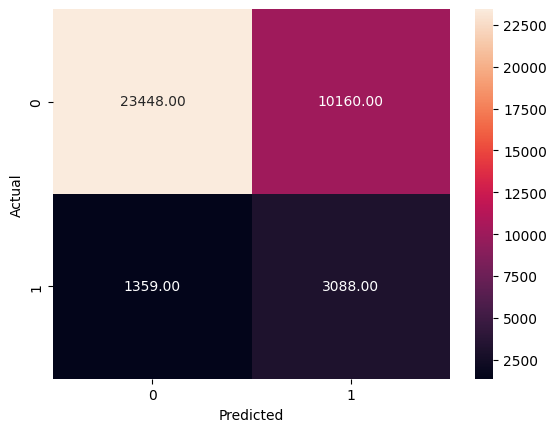

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     33608
           1       0.23      0.69      0.35      4447

    accuracy                           0.70     38055
   macro avg       0.59      0.70      0.58     38055
weighted avg       0.86      0.70      0.75     38055

--------------------------------------------------------------------------------


In [25]:
rfc_y_train_pred = rfc.predict(X_train_scaled)

print("Confusion Matrix:")
rfc_train_cm = confusion_matrix(y_train,rfc_y_train_pred,labels=[0,1])
sns.heatmap(rfc_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, rfc_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


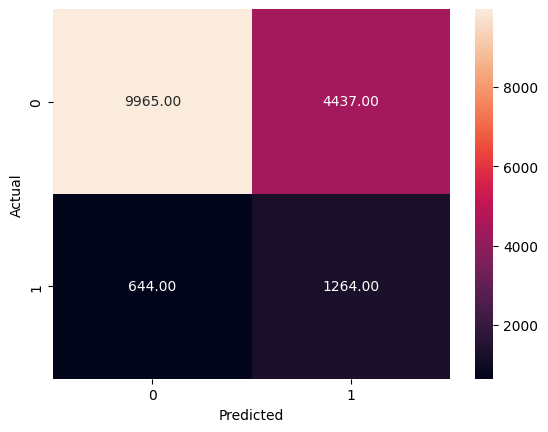

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     14402
           1       0.22      0.66      0.33      1908

    accuracy                           0.69     16310
   macro avg       0.58      0.68      0.56     16310
weighted avg       0.86      0.69      0.74     16310

--------------------------------------------------------------------------------


In [26]:
rfc_y_test_pred = rfc.predict(X_test_scaled)

print("Confusion Matrix:")
rfc_test_cm = confusion_matrix(y_test,rfc_y_test_pred,labels=[0,1])
sns.heatmap(rfc_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, rfc_y_test_pred))
print('-'*80)

### 4. K-Nearest Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

#### Checking the performance on the training dataset

Confusion Matrix:


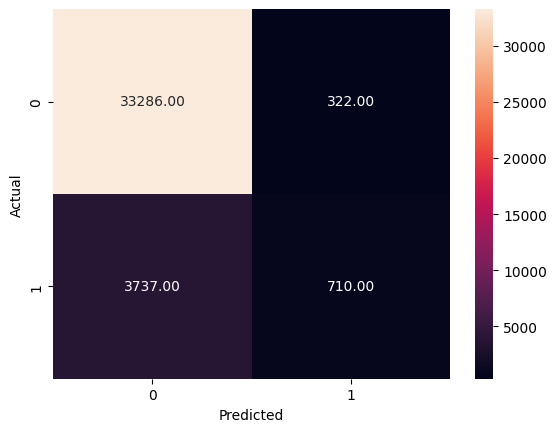

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     33608
           1       0.69      0.16      0.26      4447

    accuracy                           0.89     38055
   macro avg       0.79      0.58      0.60     38055
weighted avg       0.87      0.89      0.86     38055

--------------------------------------------------------------------------------


In [28]:
kn_y_train_pred = kn.predict(X_train_scaled)

print("Confusion Matrix:")
kn_train_cm = confusion_matrix(y_train,kn_y_train_pred,labels=[0,1])
sns.heatmap(kn_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, kn_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


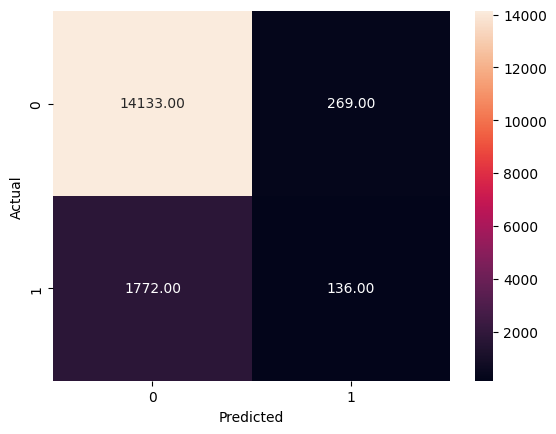

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     14402
           1       0.34      0.07      0.12      1908

    accuracy                           0.87     16310
   macro avg       0.61      0.53      0.53     16310
weighted avg       0.82      0.87      0.84     16310

--------------------------------------------------------------------------------


In [29]:
kn_y_test_pred = kn.predict(X_test_scaled)

print("Confusion Matrix:")
kn_test_cm = confusion_matrix(y_test,kn_y_test_pred,labels=[0,1])
sns.heatmap(kn_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, kn_y_test_pred))
print('-'*80)

### 5. ADABOOST Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train_scaled,y_train)

AdaBoostClassifier(n_estimators=100)

#### Checking the performance on the training dataset

Confusion Matrix:


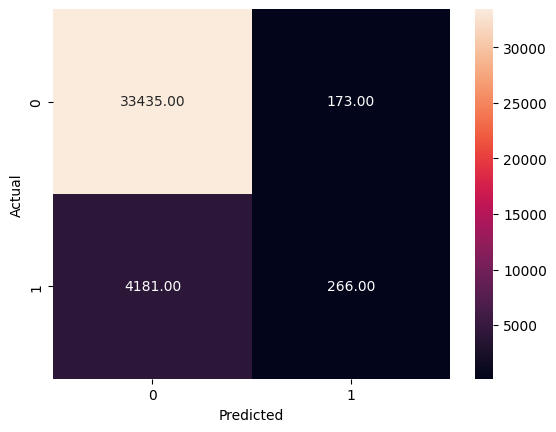

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     33608
           1       0.61      0.06      0.11      4447

    accuracy                           0.89     38055
   macro avg       0.75      0.53      0.52     38055
weighted avg       0.86      0.89      0.84     38055

--------------------------------------------------------------------------------


In [31]:
ada_y_train_pred = ada.predict(X_train_scaled)

print("Confusion Matrix:")
ada_train_cm = confusion_matrix(y_train,ada_y_train_pred,labels=[0,1])
sns.heatmap(ada_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, ada_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


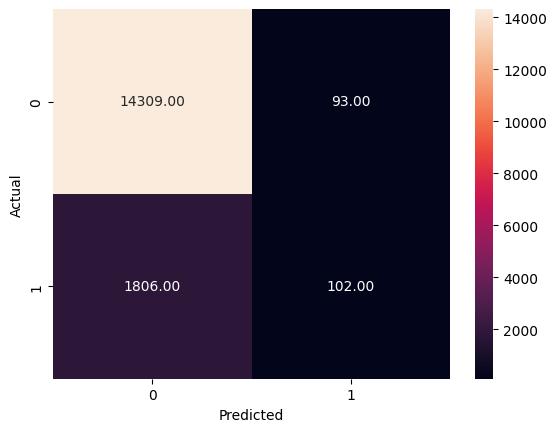

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     14402
           1       0.52      0.05      0.10      1908

    accuracy                           0.88     16310
   macro avg       0.71      0.52      0.52     16310
weighted avg       0.85      0.88      0.84     16310

--------------------------------------------------------------------------------


In [32]:
ada_y_test_pred = ada.predict(X_test_scaled)

print("Confusion Matrix:")
ada_test_cm = confusion_matrix(y_test,ada_y_test_pred,labels=[0,1])
sns.heatmap(ada_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, ada_y_test_pred))
print('-'*80)

### 6. Support Vector Classifier

In [33]:
from sklearn.svm import SVC

svc = SVC(gamma='auto',class_weight='balanced',probability=True)
svc.fit(X_train_scaled,y_train)

SVC(class_weight='balanced', gamma='auto', probability=True)

#### Checking the performance on the training dataset

Confusion Matrix:


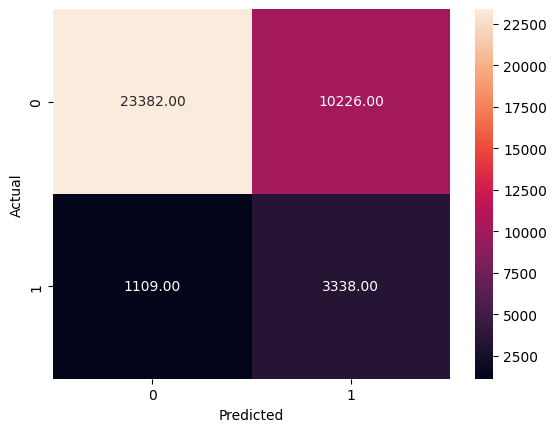

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     33608
           1       0.25      0.75      0.37      4447

    accuracy                           0.70     38055
   macro avg       0.60      0.72      0.59     38055
weighted avg       0.87      0.70      0.75     38055

--------------------------------------------------------------------------------


In [34]:
svc_y_train_pred = svc.predict(X_train_scaled)

print("Confusion Matrix:")
svc_train_cm = confusion_matrix(y_train,svc_y_train_pred,labels=[0,1])
sns.heatmap(svc_train_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train, svc_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


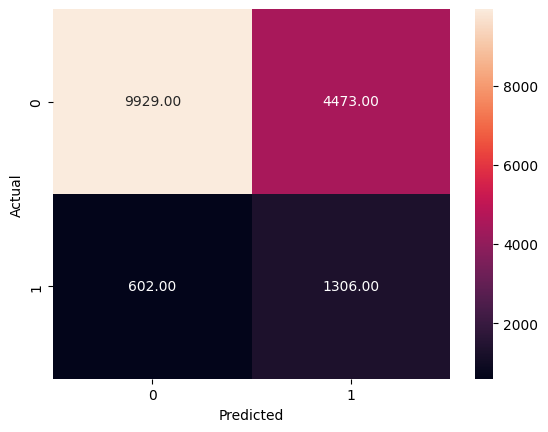

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     14402
           1       0.23      0.68      0.34      1908

    accuracy                           0.69     16310
   macro avg       0.58      0.69      0.57     16310
weighted avg       0.86      0.69      0.74     16310

--------------------------------------------------------------------------------


In [35]:
svc_y_test_pred = svc.predict(X_test_scaled)

print("Confusion Matrix:")
svc_test_cm = confusion_matrix(y_test,svc_y_test_pred,labels=[0,1])
sns.heatmap(svc_test_cm, annot=True,  fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, svc_y_test_pred))
print('-'*80)

## AUC-ROC Curve

Logistic Regression AUC-ROC = 0.755
Balanced Random Forest Classifier AUC-ROC = 0.746
Random Forest Classifier AUC-ROC = 0.743
K-Nearest Neighbor Classifier AUC-ROC = 0.614
Support Vector Classifier AUC-ROC = 0.746
ADABoost Classifier AUC-ROC = 0.751
--------------------------------------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

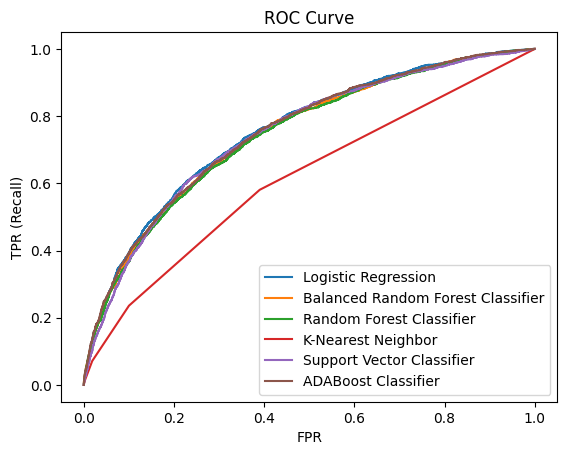

In [36]:
# AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

## Logistic Regression
lr_prob = lr.predict_proba(X_test_scaled)[:,1]
lr_fpr,lr_tpr,lr_thresholds = roc_curve(y_test,lr_prob)
lr_auc = roc_auc_score(y_test,lr_prob)
print("Logistic Regression AUC-ROC = %0.3f" % (lr_auc))

## Balanced Random Forest Classifier
brfc_prob = brfc.predict_proba(X_test_scaled)[:,1]
brfc_fpr,brfc_tpr,brfc_thresholds = roc_curve(y_test,brfc_prob)
brfc_auc = roc_auc_score(y_test,brfc_prob)
print("Balanced Random Forest Classifier AUC-ROC = %0.3f" % (brfc_auc))

## Random Forest Classifier
rfc_prob = rfc.predict_proba(X_test_scaled)[:,1]
rfc_fpr,rfc_tpr,rfc_thresholds = roc_curve(y_test,rfc_prob)
rfc_auc = roc_auc_score(y_test,rfc_prob)
print("Random Forest Classifier AUC-ROC = %0.3f" % (rfc_auc))

## K-Nearest Neighbor Classifier
kn_prob = kn.predict_proba(X_test_scaled)[:,1]
kn_fpr,kn_tpr,kn_thresholds = roc_curve(y_test,kn_prob)
kn_auc = roc_auc_score(y_test,kn_prob)
print("K-Nearest Neighbor Classifier AUC-ROC = %0.3f" % (kn_auc))

## Support Vector Classifier
svc_prob = svc.predict_proba(X_test_scaled)[:,1]
svc_fpr,svc_tpr,svc_thresholds = roc_curve(y_test,svc_prob)
svc_auc = roc_auc_score(y_test,svc_prob)
print("Support Vector Classifier AUC-ROC = %0.3f" % (svc_auc))

## ADABoost Classifier
ada_prob = ada.predict_proba(X_test_scaled)[:,1]
ada_fpr,ada_tpr,ada_thresholds = roc_curve(y_test,ada_prob)
ada_auc = roc_auc_score(y_test,ada_prob)
print("ADABoost Classifier AUC-ROC = %0.3f" % (ada_auc))

# Plotting ROC Curve
print('-'*80)
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression")
plt.plot(brfc_fpr,brfc_tpr,label="Balanced Random Forest Classifier")
plt.plot(rfc_fpr,rfc_tpr,label="Random Forest Classifier")
plt.plot(kn_fpr,kn_tpr,label="K-Nearest Neighbor")
plt.plot(svc_fpr,svc_tpr,label="Support Vector Classifier")
plt.plot(ada_fpr,ada_tpr,label="ADABoost Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show

### Train-Test Recall, Precision and F1-score

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
# Training dataset

## Logistic Regression
lr_train_precision = precision_score(y_train,lr_y_train_pred)
lr_train_recall = recall_score(y_train,lr_y_train_pred)
lr_train_f1 = f1_score(y_train,lr_y_train_pred)

## Balanced Random Forest Classifier
brfc_train_precision = precision_score(y_train,brfc_y_train_pred)
brfc_train_recall = recall_score(y_train,brfc_y_train_pred)
brfc_train_f1 = f1_score(y_train,brfc_y_train_pred)

## Random Forest Classifier
rfc_train_precision = precision_score(y_train,rfc_y_train_pred)
rfc_train_recall = recall_score(y_train,rfc_y_train_pred)
rfc_train_f1 = f1_score(y_train,rfc_y_train_pred)

## K-Nearest Neighbors
kn_train_precision = precision_score(y_train,kn_y_train_pred)
kn_train_recall = recall_score(y_train,kn_y_train_pred)
kn_train_f1 = f1_score(y_train,kn_y_train_pred)

## Support Vector Classifier
svc_train_precision = precision_score(y_train,svc_y_train_pred)
svc_train_recall = recall_score(y_train,svc_y_train_pred)
svc_train_f1 = f1_score(y_train,svc_y_train_pred)

## Support Vector Classifier
ada_train_precision = precision_score(y_train,ada_y_train_pred)
ada_train_recall = recall_score(y_train,ada_y_train_pred)
ada_train_f1 = f1_score(y_train,ada_y_train_pred)

In [39]:
# Testing dataset

## Logistic Regression
lr_test_precision = precision_score(y_test,lr_y_test_pred)
lr_test_recall = recall_score(y_test,lr_y_test_pred)
lr_test_f1 = f1_score(y_test,lr_y_test_pred)

## Balanced Random Forest Classifier
brfc_test_precision = precision_score(y_test,brfc_y_test_pred)
brfc_test_recall = recall_score(y_test,brfc_y_test_pred)
brfc_test_f1 = f1_score(y_test,brfc_y_test_pred)

## Random Forest Classifier
rfc_test_precision = precision_score(y_test,rfc_y_test_pred)
rfc_test_recall = recall_score(y_test,rfc_y_test_pred)
rfc_test_f1 = f1_score(y_test,rfc_y_test_pred)

## K-Nearest Neighbors
kn_test_precision = precision_score(y_test,kn_y_test_pred)
kn_test_recall = recall_score(y_test,kn_y_test_pred)
kn_test_f1 = f1_score(y_test,kn_y_test_pred)

## Support Vector Classifier
svc_test_precision = precision_score(y_test,svc_y_test_pred)
svc_test_recall = recall_score(y_test,svc_y_test_pred)
svc_test_f1 = f1_score(y_test,svc_y_test_pred)

## ADABoost Classifier
ada_test_precision = precision_score(y_test,ada_y_test_pred)
ada_test_recall = recall_score(y_test,ada_y_test_pred)
ada_test_f1 = f1_score(y_test,ada_y_test_pred)

In [40]:
performance = {'Model':['Logistic Regression','Balanced Random Forest Classifier','Random Forest Classifier','K-Nearest Neighbors','SVC','ADABoost Classifier'],
              'Train_Precision':[lr_train_precision,brfc_train_precision,rfc_train_precision,kn_train_precision,svc_train_precision,ada_train_precision],
              'Test_Precision':[lr_test_precision,brfc_test_precision,rfc_test_precision,kn_test_precision,svc_test_precision,ada_test_precision],
              'Train_Recall':[lr_train_recall,brfc_train_recall,rfc_train_recall,kn_train_recall,svc_train_recall,ada_train_recall],
               'Test_Recall':[lr_test_recall,brfc_test_recall,rfc_test_recall,kn_test_recall,svc_test_recall,ada_test_recall],
               'Train_f1':[lr_train_f1,brfc_train_f1,rfc_train_f1,kn_train_f1,svc_train_f1,ada_train_f1],
               'Test_f1':[lr_test_f1,brfc_test_f1,rfc_test_f1,kn_test_f1,svc_test_f1,ada_test_f1]
              }

performance_df = pd.DataFrame(performance)
performance_df

,Model,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_f1,Test_f1
0,Logistic Regression,0.218005,0.221636,0.691028,0.704403,0.331446,0.337180
1,Balanced Random Forest Classifier,0.228181,0.219741,0.713740,0.686059,0.345808,0.332867
2,Random Forest Classifier,0.233092,0.221715,0.694401,0.662474,0.349025,0.332238
3,K-Nearest Neighbors,0.687984,0.335802,0.159658,0.071279,0.259171,0.117596
4,SVC,0.246093,0.225991,0.750618,0.684486,0.370662,0.339794
5,ADABoost Classifier,0.605923,0.523077,0.059816,0.053459,0.108883,0.097004


## SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train)

In [42]:
print("Shape of the training set: ", X_train_smote.shape)   
print("Shape of the test set: ", X_test.shape)
print('-'*50)

print("Percentage of classes in the training set:")
print(y_train_smote.value_counts(normalize = True)*100)
print('-'*50)

print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True)*100)
print('-'*50)

Shape of the training set:  (67216, 25)
Shape of the test set:  (16310, 16)
--------------------------------------------------
Percentage of classes in the training set:
Default
0    50.0
1    50.0
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in the test set:
Default
0    88.301655
1    11.698345
Name: proportion, dtype: float64
--------------------------------------------------


### 1. Logistic Regression (With SMOTE)

In [43]:
lr1 = LogisticRegression()
lr1.fit(X_train_smote,y_train_smote)

LogisticRegression()

#### Checking the performance on the training dataset

Confusion Matrix:


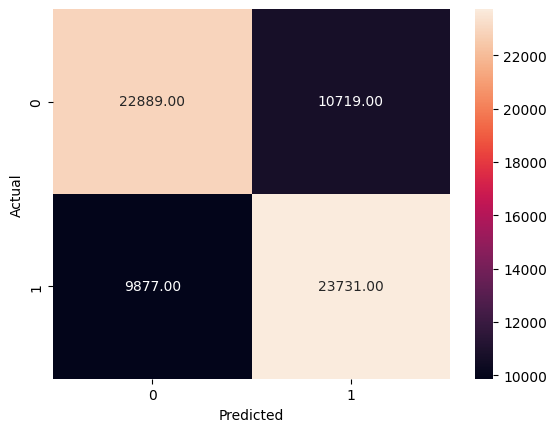

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     33608
           1       0.69      0.71      0.70     33608

    accuracy                           0.69     67216
   macro avg       0.69      0.69      0.69     67216
weighted avg       0.69      0.69      0.69     67216

--------------------------------------------------------------------------------


In [44]:
lr1_y_train_pred = lr1.predict(X_train_smote)

# Confusion Matrix
print("Confusion Matrix:")
lr1_train_cm = confusion_matrix(y_train_smote,lr1_y_train_pred,labels=[0,1])
sns.heatmap(lr1_train_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

# Classification Report
print("Classification Report:")
print(classification_report(y_train_smote, lr1_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


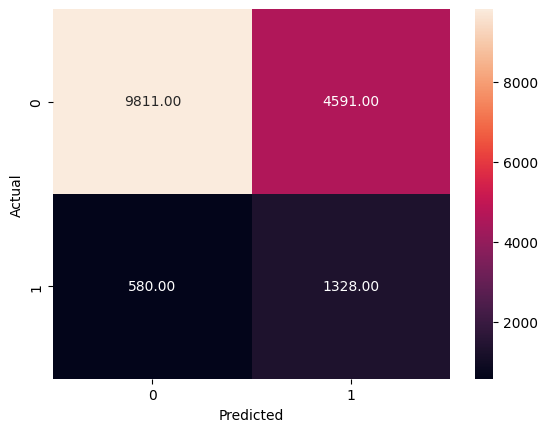

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     14402
           1       0.22      0.70      0.34      1908

    accuracy                           0.68     16310
   macro avg       0.58      0.69      0.57     16310
weighted avg       0.86      0.68      0.74     16310

--------------------------------------------------------------------------------


In [45]:
lr1_y_test_pred = lr1.predict(X_test_scaled)

# Confusion Matrix
print("Confusion Matrix:")
lr1_test_cm = confusion_matrix(y_test,lr1_y_test_pred,labels=[0,1])
sns.heatmap(lr1_test_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, lr1_y_test_pred))
print('-'*80)

### 2. Random Forest Classifier (With SMOTE)

In [46]:
rfc1 = RandomForestClassifier(random_state=42,max_depth=5,max_features=5)
rfc1.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, max_features=5, random_state=42)

#### Checking the performance on the training dataset

Confusion Matrix:


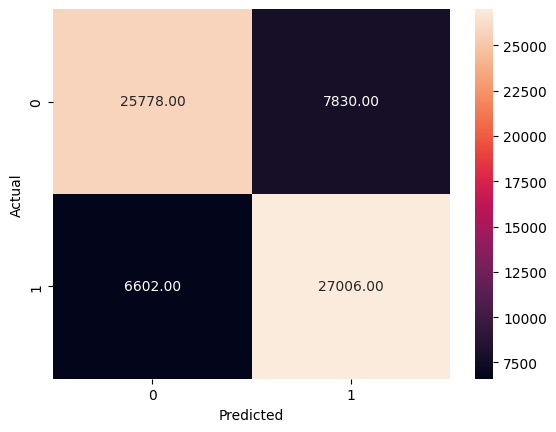

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     33608
           1       0.78      0.80      0.79     33608

    accuracy                           0.79     67216
   macro avg       0.79      0.79      0.79     67216
weighted avg       0.79      0.79      0.79     67216

--------------------------------------------------------------------------------


In [47]:
rfc1_y_train_pred = rfc1.predict(X_train_smote)

print("Confusion Matrix:")
rfc1_train_cm = confusion_matrix(y_train_smote,rfc1_y_train_pred,labels=[0,1])
sns.heatmap(rfc1_train_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train_smote, rfc1_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


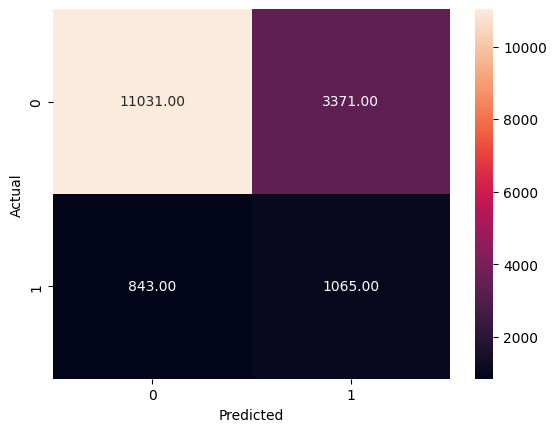

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     14402
           1       0.24      0.56      0.34      1908

    accuracy                           0.74     16310
   macro avg       0.58      0.66      0.59     16310
weighted avg       0.85      0.74      0.78     16310

--------------------------------------------------------------------------------


In [48]:
rfc1_y_test_pred = rfc1.predict(X_test_scaled)

print("Confusion Matrix:")
rfc1_test_cm = confusion_matrix(y_test,rfc1_y_test_pred,labels=[0,1])
sns.heatmap(rfc1_test_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, rfc1_y_test_pred))
print('-'*80)

### 3. K-Nearest Neighbor Classifier (With SMOTE)

In [49]:
kn1 = KNeighborsClassifier()
kn1.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

#### Checking the performance on the training dataset

Confusion Matrix:


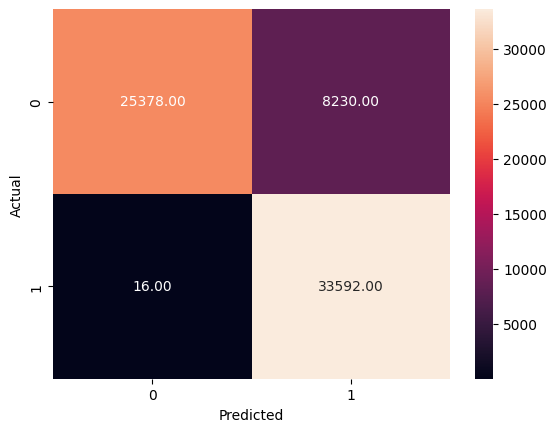

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     33608
           1       0.80      1.00      0.89     33608

    accuracy                           0.88     67216
   macro avg       0.90      0.88      0.88     67216
weighted avg       0.90      0.88      0.88     67216

--------------------------------------------------------------------------------


In [50]:
kn1_y_train_pred = kn1.predict(X_train_smote)

print("Confusion Matrix:")
kn1_train_cm = confusion_matrix(y_train_smote,kn1_y_train_pred,labels=[0,1])
sns.heatmap(kn1_train_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train_smote, kn1_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


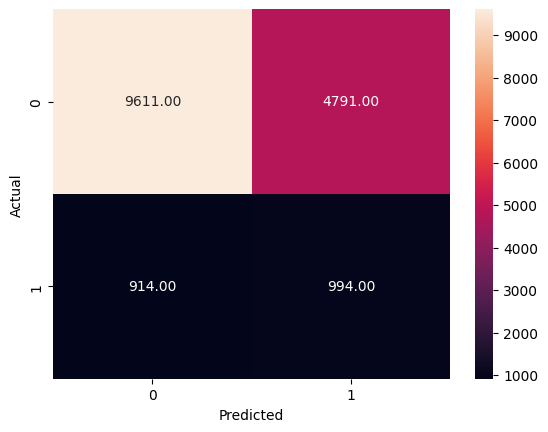

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     14402
           1       0.17      0.52      0.26      1908

    accuracy                           0.65     16310
   macro avg       0.54      0.59      0.51     16310
weighted avg       0.83      0.65      0.71     16310

--------------------------------------------------------------------------------


In [51]:
kn1_y_test_pred = kn1.predict(X_test_scaled)

print("Confusion Matrix:")
kn1_test_cm = confusion_matrix(y_test,kn1_y_test_pred,labels=[0,1])
sns.heatmap(kn1_test_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, kn1_y_test_pred))
print('-'*80)

### 4. ADABOOST Classifier (With SMOTE)

In [52]:
ada1 = AdaBoostClassifier(n_estimators=100)
ada1.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(n_estimators=100)

#### Checking the performance on the training dataset

Confusion Matrix:


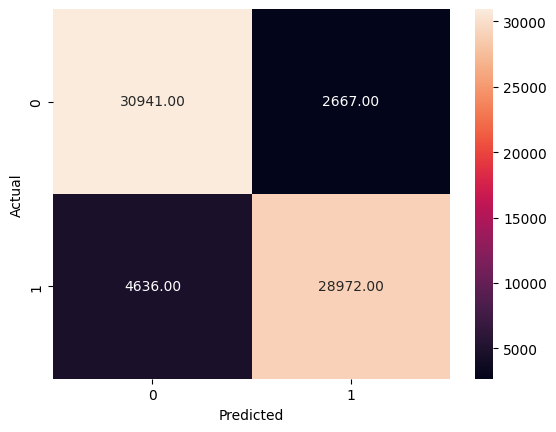

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     33608
           1       0.92      0.86      0.89     33608

    accuracy                           0.89     67216
   macro avg       0.89      0.89      0.89     67216
weighted avg       0.89      0.89      0.89     67216

--------------------------------------------------------------------------------


In [53]:
ada1_y_train_pred = ada1.predict(X_train_smote)

print("Confusion Matrix:")
ada1_train_cm = confusion_matrix(y_train_smote,ada1_y_train_pred,labels=[0,1])
sns.heatmap(ada1_train_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train_smote, ada1_y_train_pred))
print('-'*80)

#### Checking the performance on the test dataset

Confusion Matrix:


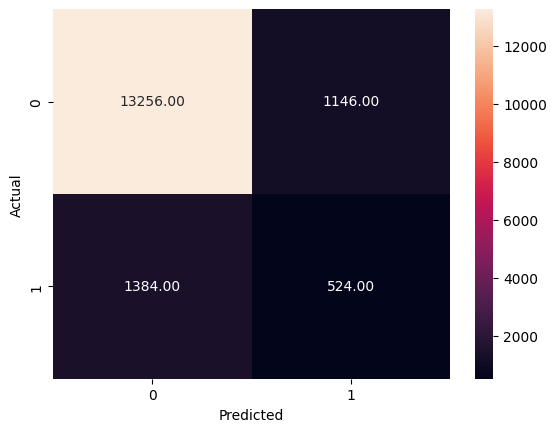

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     14402
           1       0.31      0.27      0.29      1908

    accuracy                           0.84     16310
   macro avg       0.61      0.60      0.60     16310
weighted avg       0.84      0.84      0.84     16310

--------------------------------------------------------------------------------


In [54]:
ada1_y_test_pred = ada1.predict(X_test_scaled)

print("Confusion Matrix:")
ada1_test_cm = confusion_matrix(y_test,ada1_y_test_pred,labels=[0,1])
sns.heatmap(ada1_test_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, ada1_y_test_pred))
print('-'*80)

### 5. Support Vector Classifier (With SMOTE)

In [55]:
'''
from sklearn.svm import SVC

svc1 = SVC(gamma='auto',probability=True)
svc1.fit(X_train_smote,y_train_smote)
'''

"\nfrom sklearn.svm import SVC\n\nsvc1 = SVC(gamma='auto',probability=True)\nsvc1.fit(X_train_smote,y_train_smote)\n"

#### Checking the performance on the training dataset

In [56]:
'''
svc1_y_train_pred = svc1.predict(X_train_smote)

print("Confusion Matrix:")
svc1_train_cm = confusion_matrix(y_train_smote,svc1_y_train_pred,labels=[0,1])
sns.heatmap(svc1_train_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_train_smote, svc1_y_train_pred))
print('-'*80)
'''

'\nsvc1_y_train_pred = svc1.predict(X_train_smote)\n\nprint("Confusion Matrix:")\nsvc1_train_cm = confusion_matrix(y_train_smote,svc1_y_train_pred,labels=[0,1])\nsns.heatmap(svc1_train_cm, annot=True, fmt=\'.2f\')\nplt.ylabel(\'Actual\')\nplt.xlabel(\'Predicted\')\nplt.show()\nprint(\'-\'*80)\n\nprint("Classification Report:")\nprint(classification_report(y_train_smote, svc1_y_train_pred))\nprint(\'-\'*80)\n'

#### Checking the performance on the test dataset

In [57]:
'''
svc1_y_test_pred = svc1.predict(X_test_scaled)

print("Confusion Matrix:")
svc1_test_cm = confusion_matrix(y_test,svc1_y_test_pred,labels=[0,1])
sns.heatmap(svc1_test_cm, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('-'*80)

print("Classification Report:")
print(classification_report(y_test, svc1_y_test_pred))
print('-'*80)
'''

'\nsvc1_y_test_pred = svc1.predict(X_test_scaled)\n\nprint("Confusion Matrix:")\nsvc1_test_cm = confusion_matrix(y_test,svc1_y_test_pred,labels=[0,1])\nsns.heatmap(svc1_test_cm, annot=True, fmt=\'.2f\')\nplt.ylabel(\'Actual\')\nplt.xlabel(\'Predicted\')\nplt.show()\nprint(\'-\'*80)\n\nprint("Classification Report:")\nprint(classification_report(y_test, svc1_y_test_pred))\nprint(\'-\'*80)\n'

## AUC-ROC Curve (With SMOTE)

Logistic Regression AUC-ROC = 0.755
Random Forest Classifier AUC-ROC = 0.725
K-Nearest Neighbor Classifier AUC-ROC = 0.627
ADABoost Classifier AUC-ROC = 0.729
--------------------------------------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

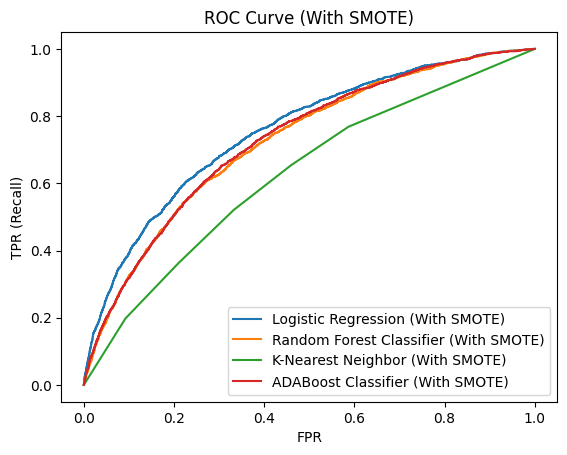

In [58]:
# AUC-ROC Curve
#from sklearn.metrics import roc_curve, roc_auc_score

## Logistic Regression
lr1_prob = lr1.predict_proba(X_test_scaled)[:,1]
lr1_fpr,lr1_tpr,lr1_thresholds = roc_curve(y_test,lr1_prob)
lr1_auc = roc_auc_score(y_test,lr1_prob)
print("Logistic Regression AUC-ROC = %0.3f" % (lr1_auc))

## Random Forest Classifier
rfc1_prob = rfc1.predict_proba(X_test_scaled)[:,1]
rfc1_fpr,rfc1_tpr,rfc1_thresholds = roc_curve(y_test,rfc1_prob)
rfc1_auc = roc_auc_score(y_test,rfc1_prob)
print("Random Forest Classifier AUC-ROC = %0.3f" % (rfc1_auc))

## K-Nearest Neighbor Classifier
kn1_prob = kn1.predict_proba(X_test_scaled)[:,1]
kn1_fpr,kn1_tpr,kn1_thresholds = roc_curve(y_test,kn1_prob)
kn1_auc = roc_auc_score(y_test,kn1_prob)
print("K-Nearest Neighbor Classifier AUC-ROC = %0.3f" % (kn1_auc))

'''
## Support Vector Classifier
svc1_prob = svc1.predict_proba(X_test_scaled)[:,1]
svc1_fpr,svc1_tpr,svc1_thresholds = roc_curve(y_test,svc1_prob)
svc1_auc = roc_auc_score(y_test,svc1_prob)
print("Support Vector Classifier AUC-ROC = %0.3f" % (svc1_auc))
'''

## ADABoost Classifier
ada1_prob = ada1.predict_proba(X_test_scaled)[:,1]
ada1_fpr,ada1_tpr,ada1_thresholds = roc_curve(y_test,ada1_prob)
ada1_auc = roc_auc_score(y_test,ada1_prob)
print("ADABoost Classifier AUC-ROC = %0.3f" % (ada1_auc))

# Plotting ROC Curve
print('-'*80)
plt.plot(lr1_fpr,lr1_tpr,label="Logistic Regression (With SMOTE)")
plt.plot(rfc1_fpr,rfc1_tpr,label="Random Forest Classifier (With SMOTE)")
plt.plot(kn1_fpr,kn1_tpr,label="K-Nearest Neighbor (With SMOTE)")
#plt.plot(svc1_fpr,svc1_tpr,label="Support Vector Classifier (With SMOTE)")
plt.plot(ada1_fpr,ada1_tpr,label="ADABoost Classifier (With SMOTE)")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("ROC Curve (With SMOTE)")
plt.legend()
plt.show

### Train-Test Recall, Precision and F1-score

In [59]:
# Training dataset

## Logistic Regression
lr1_train_precision = precision_score(y_train_smote,lr1_y_train_pred)
lr1_train_recall = recall_score(y_train_smote,lr1_y_train_pred)
lr1_train_f1 = f1_score(y_train_smote,lr1_y_train_pred)

## Random Forest Classifier
rfc1_train_precision = precision_score(y_train_smote,rfc1_y_train_pred)
rfc1_train_recall = recall_score(y_train_smote,rfc1_y_train_pred)
rfc1_train_f1 = f1_score(y_train_smote,rfc1_y_train_pred)

## K-Nearest Neighbors
kn1_train_precision = precision_score(y_train_smote,kn1_y_train_pred)
kn1_train_recall = recall_score(y_train_smote,kn1_y_train_pred)
kn1_train_f1 = f1_score(y_train_smote,kn1_y_train_pred)

'''
## Support Vector Classifier
svc1_train_precision = precision_score(y_train_smote,svc1_y_train_pred)
svc1_train_recall = recall_score(y_train_smote,svc1_y_train_pred)
svc1_train_f1 = f1_score(y_train_smote,svc1_y_train_pred)
'''

## ADABoost Classifier
ada1_train_precision = precision_score(y_train_smote,ada1_y_train_pred)
ada1_train_recall = recall_score(y_train_smote,ada1_y_train_pred)
ada1_train_f1 = f1_score(y_train_smote,ada1_y_train_pred)

In [60]:
# Testing dataset

## Logistic Regression
lr1_test_precision = precision_score(y_test,lr1_y_test_pred)
lr1_test_recall = recall_score(y_test,lr1_y_test_pred)
lr1_test_f1 = f1_score(y_test,lr1_y_test_pred)

## Random Forest Classifier
rfc1_test_precision = precision_score(y_test,rfc1_y_test_pred)
rfc1_test_recall = recall_score(y_test,rfc1_y_test_pred)
rfc1_test_f1 = f1_score(y_test,rfc1_y_test_pred)

## K-Nearest Neighbors
kn1_test_precision = precision_score(y_test,kn1_y_test_pred)
kn1_test_recall = recall_score(y_test,kn1_y_test_pred)
kn1_test_f1 = f1_score(y_test,kn1_y_test_pred)

'''
## Support Vector Classifier
svc1_test_precision = precision_score(y_test,svc1_y_test_pred)
svc1_test_recall = recall_score(y_test,svc1_y_test_pred)
svc1_test_f1 = f1_score(y_test,svc1_y_test_pred)
'''

## ADABoost Classifier
ada1_test_precision = precision_score(y_test,ada1_y_test_pred)
ada1_test_recall = recall_score(y_test,ada1_y_test_pred)
ada1_test_f1 = f1_score(y_test,ada1_y_test_pred)

In [61]:
performance1= {'Model':['Logistic Regression (With SMOTE)','Random Forest Classifier (With SMOTE)','K-Nearest Neighbors (With SMOTE)','ADABoost Classifier (With SMOTE)'],
              'Train_Precision':[lr1_train_precision,rfc1_train_precision,kn1_train_precision,ada1_train_precision],
              'Test_Precision':[lr1_test_precision,rfc1_test_precision,kn1_test_precision,ada1_test_precision],
              'Train_Recall':[lr1_train_recall,rfc1_train_recall,kn1_train_recall,ada1_train_recall],
               'Test_Recall':[lr1_test_recall,rfc1_test_recall,kn1_test_recall,ada1_test_recall],
               'Train_f1':[lr1_train_f1,rfc1_train_f1,kn1_train_f1,ada1_train_f1],
               'Test_f1':[lr1_test_f1,rfc1_test_f1,kn1_test_f1,ada1_test_f1]
              }

performance_df1 = pd.DataFrame(performance1)
performance_df1

,Model,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_f1,Test_f1
0,Logistic Regression (With SMOTE),0.688853,0.224362,0.706112,0.696017,0.697376,0.339338
1,Random Forest Classifier (With SMOTE),0.775233,0.240081,0.803559,0.558176,0.789141,0.335750
2,K-Nearest Neighbors (With SMOTE),0.803214,0.171824,0.999524,0.520964,0.890680,0.258417
3,ADABoost Classifier (With SMOTE),0.915705,0.313772,0.862057,0.274633,0.888071,0.292901
